# Data Preparation

### Data reader

In [1]:
import os
import hazm
import progressbar

bjkh = hazm.BijankhanReader(os.path.join('resources', 'BijanKhan_Full_Corpus', 'Collection UNI.txt'))

In [2]:
# read a sentence
sent = next(bjkh.sents())
print(sent)

# separate sentnece from POS
print(list(zip(*sent))[0])

[('اولین', 'ADJ'), ('سیاره', 'N'), ('خارج', 'ADJ'), ('از', 'PREP'), ('منظومه', 'N'), ('شمسی', 'ADJ'), ('دیده_شد', 'V'), ('.', 'PUNC')]
('اولین', 'سیاره', 'خارج', 'از', 'منظومه', 'شمسی', 'دیده_شد', '.')


In [3]:
#sentences = [list(zip(*i))[0] for i in bjkh.sents()]

sentences = []
bar = progressbar.ProgressBar()
for ind, i in enumerate(bar(bjkh.sents())):
    sentences.append(list(zip(*i))[0])

    # load just a morsel of corpus
    if ind == 1000:
        break
        
print('\n'.join([' '.join(i) for i in sentences[:10]]))

- 992 Elapsed Time: 0:00:00                                                    

اولین سیاره خارج از منظومه شمسی دیده_شد .
واشنگتن _ خبرگزاری جمهوری اسلامی
ستاره شناسان می‌گویند که ممکن است اولین سیاره خارج از منظومه شمسی را دیده_باشند .
طی سالهای اخیر ، بیش از دو دوجین سیاره در مدار اطراف ستاره‌ها کشف شده اند .
لیکن ستاره شناسان هرگز این سیاره‌ها را واقعاً ندیده_بودند و فقط از طریق شواهد ، لرزش‌ها و اثراتی که آنان بر اجرام اطراف خود می‌گذاشتند ، موفق به ثبت این سیارات شده_بودند .
چنین تصور می‌شد که این لرزش به علت جاذبه سیاره‌ای در مدار بوده_است .
در آخرین تحقیق به عمل آمده نیز ستاره شناسان هنوز واقعاً موفق به رویت مستقیم سیاره نشده اند ، بلکه درخشش ستاره‌ای را دیده اند که به اعتقاد آنها توسط یک سیاره منعکس شده_است .
بنا بر این گزارش ، درخشش کورکننده این سیاره ، دیدن آن را نامحتمل می‌کند .
چنانچه این پژوهشگران درست حدس زده_باشند ، یافته‌های آنها می‌تواند برای تشخیص حجم و ضخامت دقیق سیاره مزبور مورد استفاده قرار گیرد .
مشروح این گزارش در شماره اخیر مجله نیچر به چاپ رسیده_است .


### Data cleaning

bijankhan is processed and tokenized corpus, others needs the following processes:

In [4]:
from hazm import Normalizer

sent = 'اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند.'
normalizer = Normalizer()
normalized_sent = normalizer.normalize(sent)
print(normalized_sent)

اصلاح نویسه‌ها و استفاده از نیم‌فاصله پردازش را آسان می‌کند.


In [5]:
from hazm import word_tokenize

word_tokenize(normalized_sent)

['اصلاح',
 'نویسه\u200cها',
 'و',
 'استفاده',
 'از',
 'نیم\u200cفاصله',
 'پردازش',
 'را',
 'آسان',
 'می\u200cکند',
 '.']

### histogram of frequencies (1000 sentences)

In [6]:
from collections import Counter

agg_sentences = sum(sentences, ())
wc = Counter(agg_sentences)

In [7]:
wc

Counter({'فرزندش': 1,
         'آتش': 1,
         'مطبوعاتی': 1,
         'می\u200cکردید': 2,
         'تاریخ': 1,
         'می\u200cدید': 1,
         'بیا': 2,
         'خلاف': 1,
         'بیشترین': 3,
         'بخوبی': 2,
         'سکوت': 5,
         'شوند': 1,
         'اصرار': 1,
         'بگیرد': 3,
         'می\u200cدانستیم': 1,
         'چهره': 9,
         'متبسم': 1,
         'تند': 3,
         'فر': 1,
         'بیدارم': 1,
         'سه': 13,
         'بکنند': 3,
         'آرمسترانگ': 1,
         'آخر': 7,
         '۴': 1,
         'خط': 14,
         'صدیقی': 1,
         'فیلم\u200cها': 1,
         'ستاره': 1,
         'فرش': 1,
         'مفهوم': 1,
         'نحوی': 1,
         'قابل': 4,
         'بیار': 1,
         'ارضای': 1,
         'خودتان': 3,
         'سعی': 18,
         'نهی': 1,
         'سال': 15,
         'خلاقیت': 2,
         'مقوله': 2,
         'گوناگون': 2,
         'هماهنگی': 1,
         'کوپن': 1,
         'سرقت': 2,
         'روزه م': 3,
         'هستیم': 1

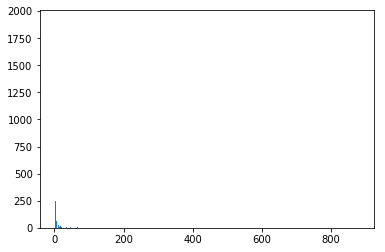

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()

my_plt = plt.hist(wc.values(), bins=1001)

### histogram of frequencies (full corpus)

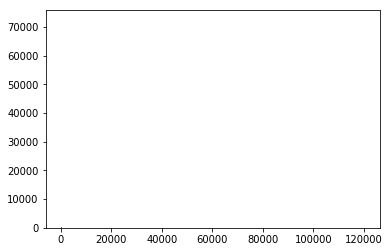

In [9]:
import json

with open(os.path.join('codes', 'word_list.json')) as f:
    wc = json.load(f)

l = list(wc.values())
my_plt = plt.hist(l, bins=3001)

### word indexing

In [10]:
# choose cut off
co = 100
word_list = ['<s>', '</s>', '<ukn>'] + [k for k, v in sorted(wc.items(), key=lambda x: x[1], reverse=True) if v >= co]

In [11]:
with open('word_list_co{}.txt'.format(co), 'w+') as f, open('word_list.json', 'w+') as jf:
    json.dump(wc, jf)
    f.write('\n'.join(word_list))

In [12]:
from multiprocessing import Pool


def index_sentence(sent):
    def word2ind(word):
        try:
            return str(word_list.index(word))
        except Exception as E:
            return str(word_list.index('<ukn>'))
        
    return ' '.join([word2ind(i) for i in ['<s>'] + list(sent) + ['</s>']])

p = Pool(4)
indexed_sentences = p.map(index_sentence, sentences)

In [13]:
with open(os.path.join('resources', 'bijankhan_indexed.txt'), 'w+') as f:
    f.write('\n'.join(indexed_sentences))